In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
file_path = 'preprocessed_dataset.csv'
data = pd.read_csv(file_path)

columns = ['line_number', 'merchant', 'category', 'amt', 'gender', 'city', 'state','city_pop', 'job', 'is_fraud', 'unix_time', 'age']

categorical_columns_onehot = ['gender', 'category']
categorical_columns_label = ['merchant', 'city','state', 'job']
numerical_columns = ['line_number', 'amt', 'city_pop','unix_time', 'age']

scaler = StandardScaler()
encoder = OneHotEncoder()
label = LabelEncoder()

for col in categorical_columns_label:
    data[col] = label.fit_transform(data[col])

scaled_data = scaler.fit_transform(data[numerical_columns])
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)

encoded_data_onehot = encoder.fit_transform(data[categorical_columns_onehot]).toarray()
encoded_df_onehot = pd.DataFrame(encoded_data_onehot, columns=encoder.get_feature_names_out(categorical_columns_onehot))

combined_df = pd.concat([scaled_df, encoded_df_onehot, data[categorical_columns_label], data['is_fraud']], axis=1)

print(combined_df.head())
print(combined_df.info())

combined_df.to_csv('preprocessed_classification_data.csv', index=False)

   line_number       amt  city_pop  unix_time       age  gender_F  gender_M  \
0    -1.731937 -0.414795 -0.291445  -1.927175  2.707510       1.0       0.0   
1    -1.731708  0.200667 -0.286602  -1.926848  0.701342       1.0       0.0   
2    -1.731480 -0.235037 -0.291058  -1.926565 -0.502360       0.0       1.0   
3    -1.731251 -0.295917 -0.288782  -1.926236 -1.763380       1.0       0.0   
4    -1.731023  0.129765 -0.293720  -1.925884  0.013512       0.0       1.0   

   category_entertainment  category_food_dining  category_gas_transport  ...  \
0                     0.0                   0.0                     0.0  ...   
1                     0.0                   1.0                     0.0  ...   
2                     0.0                   0.0                     0.0  ...   
3                     0.0                   0.0                     0.0  ...   
4                     0.0                   0.0                     0.0  ...   

   category_misc_pos  category_personal_care

Training Accuracy: 1.0
Testing Accuracy: 0.9950544015825915


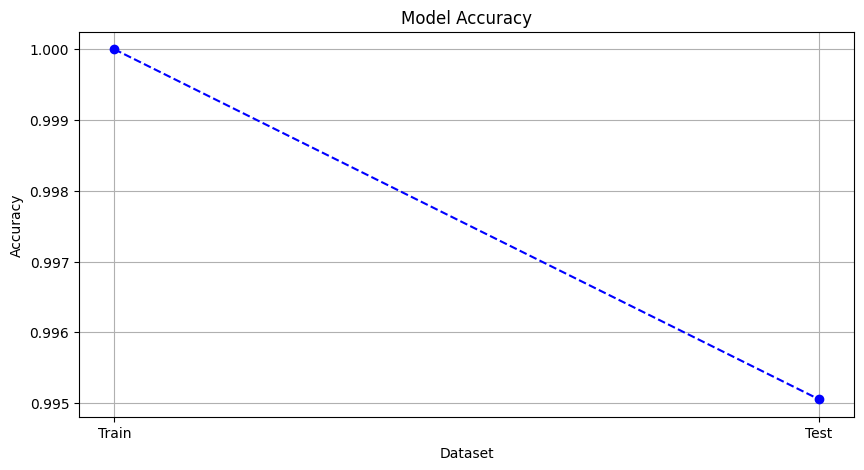

In [3]:
data = pd.read_csv('preprocessed_classification_data.csv')

X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)